Importing dataset, and understanding data information


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('./train_data.csv')
test_df = pd.read_csv('./test_data.csv')

print(train_df.info())
print(test_df.info())

print(train_df.head())
print(test_df.head())

print(train_df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UID         712 non-null    int64  
 1   Feature_1   710 non-null    object 
 2   Feature_2   712 non-null    int64  
 3   Feature_3   712 non-null    int64  
 4   Feature_4   712 non-null    int64  
 5   Feature_5   712 non-null    int64  
 6   Feature_6   159 non-null    object 
 7   Feature_7   712 non-null    int64  
 8   Feature_8   712 non-null    int64  
 9   Feature_9   712 non-null    object 
 10  Feature_10  572 non-null    float64
 11  Feature_11  712 non-null    int64  
 12  Feature_12  712 non-null    object 
 13  Feature_13  712 non-null    int64  
 14  Feature_14  712 non-null    int64  
 15  Feature_15  712 non-null    float64
 16  Feature_16  712 non-null    int64  
 17  Target      712 non-null    int64  
dtypes: float64(2), int64(12), object(4)
memory usage: 100.3+ KB
None
<clas

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('/content/train_data.csv')
test_df = pd.read_csv('/content/test_data.csv')

print(train_df.info())
print(test_df.info())

print(train_df.head())
print(test_df.head())

print(train_df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UID         712 non-null    int64  
 1   Feature_1   710 non-null    object 
 2   Feature_2   712 non-null    int64  
 3   Feature_3   712 non-null    int64  
 4   Feature_4   712 non-null    int64  
 5   Feature_5   712 non-null    int64  
 6   Feature_6   159 non-null    object 
 7   Feature_7   712 non-null    int64  
 8   Feature_8   712 non-null    int64  
 9   Feature_9   712 non-null    object 
 10  Feature_10  572 non-null    float64
 11  Feature_11  712 non-null    int64  
 12  Feature_12  712 non-null    object 
 13  Feature_13  712 non-null    int64  
 14  Feature_14  712 non-null    int64  
 15  Feature_15  712 non-null    float64
 16  Feature_16  712 non-null    int64  
 17  Target      712 non-null    int64  
dtypes: float64(2), int64(12), object(4)
memory usage: 100.3+ KB
None
<clas

# handling missing values and outlier detection.


<ipython-input-58-e7cf6b5cf74b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.index, y=missing_percentage, palette="viridis")


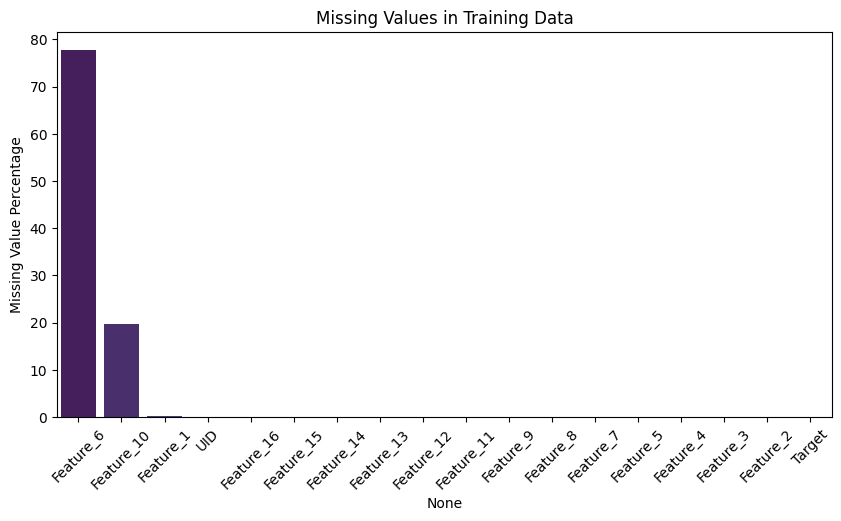

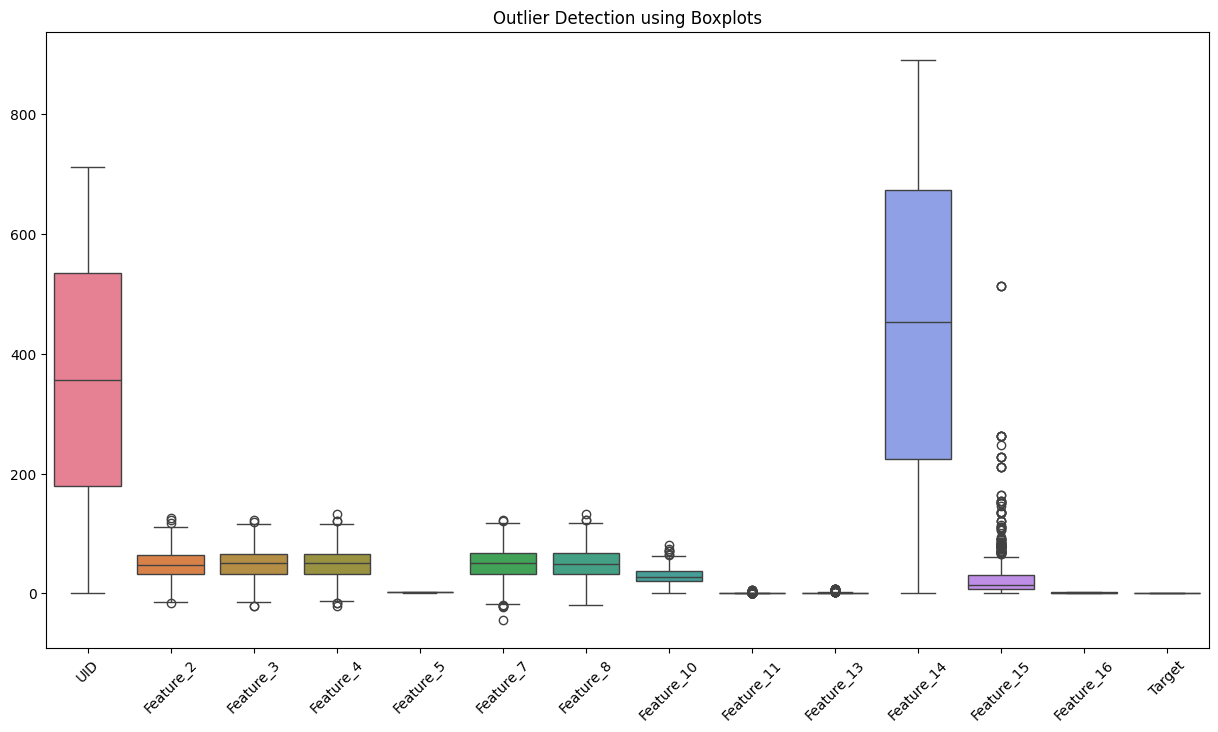

In [58]:
import seaborn as sns
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(train_df)) * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_percentage.index, y=missing_percentage, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Missing Value Percentage")
plt.title("Missing Values in Training Data")
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(data=train_df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=45)
plt.title("Outlier Detection using Boxplots")
plt.show()



In Feature_6: More than 70% values are missing, so we consider dropping them or advanced imputation.
Feature_10:  (140/712 values missing), so we Impute with median or mean.
Feature_1: Only 2 missing values so we fill with mode (most frequent value).

Feature_2, Feature_3, Feature_4, Feature_8 contain negative values so they need correction or removal.
Feature_15 has extreme outliers which need transformation or capping.


Now I will be handling missing values (impute/drop).
Fix the negative values and outliers.
Analyze correlations to remove redundant features.

In [59]:

train_df["Feature_1"].fillna(train_df["Feature_1"].mode()[0], inplace=True)  # Filling missing values with mode
train_df["Feature_10"].fillna(train_df["Feature_10"].median(), inplace=True)  # Filling missing values with median


# Fix negative values by replacing with NaN (for now) and imputing later
numeric_features = ["Feature_2", "Feature_3", "Feature_4", "Feature_8"]
for feature in numeric_features:
    train_df[feature] = train_df[feature].apply(lambda x: x if x >= 0 else None)
    test_df[feature] = test_df[feature].apply(lambda x: x if x >= 0 else None)

# Impute fixed negative values with median
for feature in numeric_features:
    train_df[feature].fillna(train_df[feature].median(), inplace=True)
    test_df[feature].fillna(test_df[feature].median(), inplace=True)

# Confirm missing values are handled
train_df.isnull().sum()

<ipython-input-59-39f994a84e63>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Feature_1"].fillna(train_df["Feature_1"].mode()[0], inplace=True)  # Filling missing values with mode
<ipython-input-59-39f994a84e63>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

,0
UID,0
Feature_1,0
Feature_2,0
Feature_3,0
Feature_4,0
Feature_5,0
Feature_6,553
Feature_7,0
Feature_8,0
Feature_9,0


Now I will be encoding the categorical values
Label Encoding (for categorical features with a small number of unique values):
Feature_1, Feature_12

One-Hot Encoding (for categorical features with many unique values):
Feature_9

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train_encoded = train_df.copy()
test_encoded = test_df.copy()

# Label Encoding for Feature_1 and Feature_12
label_encoders = {}
for col in ["Feature_1", "Feature_12"]:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train_encoded[col])

    label_encoders[col] = le  # Save the encoder for future use

# One-Hot Encoding for Feature_9 (High Cardinality)
train_encoded = pd.get_dummies(train_encoded, columns=["Feature_9"], drop_first=True)
test_encoded = pd.get_dummies(test_encoded, columns=["Feature_9"], drop_first=True)

# Ensure both train and test have the same columns after encoding
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Display encoded data
print(train_encoded.head())
print(test_encoded.head())


   UID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5 Feature_6  \
0    1          2       45.0       11.0       39.0          1      C124   
1    2          2       74.0       35.0       36.0          2       NaN   
2    3          2       62.0       38.0      100.0          3       NaN   
3    4          2       59.0       94.0       51.0          3       NaN   
4    5          2       26.0       72.0       33.0          3       NaN   

   Feature_7  Feature_8  Feature_10  ...  Feature_9_STON/O2. 3101283  \
0         45       30.0        45.5  ...                       False   
1         14       99.0        23.0  ...                       False   
2         65       47.0        32.0  ...                       False   
3         17       26.0        26.0  ...                       False   
4         45       17.0         6.0  ...                       False   

   Feature_9_STON/O2. 3101290  Feature_9_SW/PP 751  Feature_9_W./C. 14258  \
0                       False          

Normalising the numerical features

In [61]:
from sklearn.preprocessing import StandardScaler
#Applying to numerical features
numerical_features = ["Feature_2", "Feature_3", "Feature_4", "Feature_5", "Feature_7", "Feature_8",
                      "Feature_10", "Feature_11", "Feature_13", "Feature_14", "Feature_15", "Feature_16"]

scaler = StandardScaler()
train_encoded[numerical_features] = scaler.fit_transform(train_encoded[numerical_features])
test_encoded[numerical_features] = scaler.transform(test_encoded[numerical_features])

# Display scaled data
print(train_encoded.head())


   UID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5 Feature_6  \
0    1          2  -0.205781  -1.710407  -0.533697  -1.614136      C124   
1    2          2   1.005784  -0.685925  -0.664579  -0.400551       NaN   
2    3          2   0.504447  -0.557865   2.127560   0.813034       NaN   
3    4          2   0.379113   1.832592  -0.010172   0.813034       NaN   
4    5          2  -0.999565   0.893484  -0.795460   0.813034       NaN   

   Feature_7  Feature_8  Feature_10  ...  Feature_9_STON/O2. 3101283  \
0  -0.189341  -0.916656    1.253641  ...                       False   
1  -1.422491   2.028827   -0.477284  ...                       False   
2   0.606239  -0.190958    0.215086  ...                       False   
3  -1.303154  -1.087409   -0.246494  ...                       False   
4  -0.189341  -1.471602   -1.785093  ...                       False   

   Feature_9_STON/O2. 3101290  Feature_9_SW/PP 751  Feature_9_W./C. 14258  \
0                       False          

Model training and evaluation

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = train_encoded.drop(columns=["UID", "Target"])
y = train_encoded["Target"]

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train)
print(y_train)

     Feature_1  Feature_2  Feature_3  Feature_4  Feature_5 Feature_6  \
557          2  -0.372893   0.765424  -0.751833  -1.614136       E12   
369          1   0.003110  -1.368913  -0.708206   0.813034       NaN   
684          2  -0.289337  -0.387118  -1.144478  -0.400551       NaN   
342          2   0.838672   0.125122   0.731490   0.813034       NaN   
647          2  -0.247559   0.551990   2.171187  -0.400551       F33   
..         ...        ...        ...        ...        ...       ...   
71           2   1.924903  -1.326226   0.775117   0.813034       NaN   
106          2  -0.247559  -0.856672  -1.057223   0.813034       NaN   
270          2   0.462669   0.637363  -1.144478  -0.400551       NaN   
435          2   0.629781   0.637363  -0.228307   0.813034       NaN   
102          2  -1.500902  -0.045624  -0.271934   0.813034       NaN   

     Feature_7  Feature_8  Feature_10  Feature_11  ...  \
557   0.486902  -0.617839    1.445966   -0.479342  ...   
369   0.844913  -0.

In [63]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train_encoded = train_df.copy()
test_encoded = test_df.copy()

# Label Encoding for Feature_1 and Feature_12
label_encoders = {}
for col in ["Feature_1", "Feature_12"]:
    le = LabelEncoder()

    # Convert the column to string type before fitting LabelEncoder
    train_encoded[col] = le.fit_transform(train_encoded[col].astype(str))

    label_encoders[col] = le  # Save the encoder for future use

# One-Hot Encoding for Feature_9 (High Cardinality)
# Get a list of object (string) columns
object_cols = train_encoded.select_dtypes(include=['object']).columns.tolist()
# One-hot encode all object columns, excluding Feature_1 and Feature_12
for col in object_cols:
    if col not in ["Feature_1", "Feature_12", "UID", "Target"]: # Exclude already encoded and irrelevant columns
        train_encoded = pd.get_dummies(train_encoded, columns=[col], drop_first=True, prefix=[col])
        test_encoded = pd.get_dummies(test_encoded, columns=[col], drop_first=True, prefix=[col])


# Ensuring both train and test have the same columns after encoding
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Displaying encoded data
print(train_encoded.head())
print(test_encoded.head())

   UID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_7  \
0    1          2       45.0       11.0       39.0          1         45   
1    2          2       74.0       35.0       36.0          2         14   
2    3          2       62.0       38.0      100.0          3         65   
3    4          2       59.0       94.0       51.0          3         17   
4    5          2       26.0       72.0       33.0          3         45   

   Feature_8  Feature_10  Feature_11  ...  Feature_9_STON/O2. 3101283  \
0       30.0        45.5           0  ...                       False   
1       99.0        23.0           0  ...                       False   
2       47.0        32.0           0  ...                       False   
3       26.0        26.0           0  ...                       False   
4       17.0         6.0           2  ...                       False   

   Feature_9_STON/O2. 3101290  Feature_9_SW/PP 751  Feature_9_W./C. 14258  \
0                       Fal

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features (X) and target (y)
X = train_encoded.drop(columns=["UID", "Target"])
y = train_encoded["Target"]

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print(f"\n🔹 Model: {name}")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Model: Logistic Regression
Accuracy: 0.7062937062937062
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78        87
           1       0.68      0.46      0.55        56

    accuracy                           0.71       143
   macro avg       0.70      0.66      0.67       143
weighted avg       0.70      0.71      0.69       143

Confusion Matrix:
 [[75 12]
 [30 26]]

🔹 Model: Random Forest
Accuracy: 0.6643356643356644
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        87
           1       0.64      0.32      0.43        56

    accuracy                           0.66       143
   macro avg       0.66      0.60      0.60       143
weighted avg       0.66      0.66      0.63       143

Confusion Matrix:
 [[77 10]
 [38 18]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:56:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 Model: XGBoost
Accuracy: 0.6573426573426573
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        87
           1       0.59      0.43      0.49        56

    accuracy                           0.66       143
   macro avg       0.64      0.62      0.62       143
weighted avg       0.65      0.66      0.64       143

Confusion Matrix:
 [[70 17]
 [32 24]]


In [65]:
# Import necessary libraries
import pandas as pd

# Select the best model (Replace 'Logistic Regression' with the best-performing model)
best_model = models["Logistic Regression"]  # Example: Change this based on performance

# Prepare test data (drop UID and Target, ensuring same columns as X_train)
X_test = test_encoded.drop(columns=["UID", "Target"])

# Ensure all columns are numeric
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric columns and handle them
if X_test.isnull().values.any():
    print("There are some non-numeric values in the test set that need to be handled.")
    # Fill or drop NaNs that resulted from non-numeric conversions
    X_test = X_test.fillna(0)  # Example: Filling NaNs with 0

# Predict Target values for test set
test_predictions = best_model.predict(X_test)

# Create submission dataframe
submission = pd.DataFrame({
    "UID": test_encoded["UID"],
    "Target": test_predictions
})

# Save submission file
submission.to_csv("Jayaditya_sahu_submission.csv", index=False)
print("✅ Submission file 'Jayaditya_sahu_submission.csv' is ready!")


There are some non-numeric values in the test set that need to be handled.
✅ Submission file 'Jayaditya_sahu_submission.csv' is ready!


# Advanced Feature Engineering

In [66]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# Create interaction features (example)
train_encoded['Interaction_2_3'] = train_encoded['Feature_2'] * train_encoded['Feature_3']
test_encoded['Interaction_2_3'] = test_encoded['Feature_2'] * test_encoded['Feature_3']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
train_encoded[['Feature_2', 'Feature_3', 'Feature_10']] = imputer.fit_transform(train_encoded[['Feature_2', 'Feature_3', 'Feature_10']])
test_encoded[['Feature_2', 'Feature_3', 'Feature_10']] = imputer.transform(test_encoded[['Feature_2', 'Feature_3', 'Feature_10']])

# Polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(train_encoded[['Feature_2', 'Feature_3', 'Feature_10']])
train_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out())
test_poly = pd.DataFrame(poly.transform(test_encoded[['Feature_2', 'Feature_3', 'Feature_10']]), columns=poly.get_feature_names_out())

train_encoded = pd.concat([train_encoded, train_poly], axis=1)
test_encoded = pd.concat([test_encoded, test_poly], axis=1)


In [67]:
!pip install category_encoders


#Advanced Categorical Encoding (Target Encoding)

In [68]:
# Target Encoding for high-cardinality features
from category_encoders import TargetEncoder

# For Feature_9 (assuming it's categorical)
encoder = TargetEncoder(cols=['Feature_9'])
train_encoded['Feature_9_encoded'] = encoder.fit_transform(train_df['Feature_9'], y)
test_encoded['Feature_9_encoded'] = encoder.transform(test_df['Feature_9'])

# Remove original Feature_9 columns if using one-hot encoding

In [69]:
!pip install scikit-learn==0.24.2 xgboost==1.4.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 38.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


#Hyperparameter Tuning (XGBoost Example)

In [70]:
!pip install --upgrade scikit-learn xgboost
!pip cache purge
!pip install --no-cache-dir scikit-learn xgboost



Files removed: 36


In [71]:
!pip install --upgrade scikit-learn xgboost



In [72]:
from sklearn.base import ClassifierMixin
from xgboost import XGBClassifier

# Create a compatibility wrapper
class CompatibleXGBClassifier(XGBClassifier, ClassifierMixin):
    def __sklearn_tags__(self):
        return {"requires_y": True}

# Use this instead of raw XGBClassifier
xgb = CompatibleXGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False
)

In [73]:
!pip install --upgrade scikit-learn xgboost
!pip cache purge
!pip install --no-cache-dir scikit-learn xgboost

Files removed: 4


In [74]:
print(train_encoded.columns)
print(test_encoded.columns)


Index(['UID', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_7', 'Feature_8', 'Feature_10', 'Feature_11',
       ...
       'Feature_9_W/C 14208', 'Feature_9_WE/P 5735', 'Interaction_2_3',
       'Feature_2', 'Feature_3', 'Feature_10', 'Feature_2 Feature_3',
       'Feature_2 Feature_10', 'Feature_3 Feature_10', 'Feature_9_encoded'],
      dtype='object', length=697)
Index(['UID', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_7', 'Feature_8', 'Feature_10', 'Feature_11',
       ...
       'Feature_9_W/C 14208', 'Feature_9_WE/P 5735', 'Interaction_2_3',
       'Feature_2', 'Feature_3', 'Feature_10', 'Feature_2 Feature_3',
       'Feature_2 Feature_10', 'Feature_3 Feature_10', 'Feature_9_encoded'],
      dtype='object', length=697)


In [75]:
from sklearn.impute import KNNImputer

# Ensure Feature_6 is in the DataFrame
if 'Feature_6' in train_encoded.columns and 'Feature_6' in test_encoded.columns:
    # For Feature_6 with 70% missing
    imputer = KNNImputer(n_neighbors=5)
    train_encoded['Feature_6'] = imputer.fit_transform(train_encoded[['Feature_6']])
    test_encoded['Feature_6'] = imputer.transform(test_encoded[['Feature_6']])

    # Add missing indicator
    train_encoded['Feature_6_missing'] = train_encoded['Feature_6'].isnull().astype(int)
    test_encoded['Feature_6_missing'] = test_encoded['Feature_6'].isnull().astype(int)
else:
    print("Feature_6 not found in one of the DataFrames.")


Feature_6 not found in one of the DataFrames.


In [76]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Use this balanced data for training

In [77]:
from sklearn.preprocessing import RobustScaler

# Initialize scaler (uses quantiles to minimize outlier impact)
scaler = RobustScaler()

# Fit on training data, transform both train/test
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [78]:
from sklearn.linear_model import LogisticRegression

# Calculate class weights automatically
model = LogisticRegression(
    class_weight='balanced',  # Auto-adjusts weights inversely proportional to class freq
    solver='liblinear',  # Works well with class weights
    penalty='l1',  # L1 regularization for feature selection
    max_iter=1000
)

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline  # If using imbalanced-learn's pipeline

# Define the pipeline
pipeline = Pipeline([
    ('smote', SMOTE()),  # Example if you have SMOTE in your pipeline
    ('logisticregression', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# Define parameter grid
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'logisticregression__penalty': ['l1', 'l2']
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',  # Use F1-score for imbalanced data
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_lr = grid_search.best_estimator_


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 526, in fit
    self._final_estimator.fit(Xt, yt, **

In [80]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred = best_lr.predict(X_val_scaled)
y_proba = best_lr.predict_proba(X_val_scaled)[:, 1]  # Probabilities for ROC-AUC

# Metrics
print(classification_report(y_val, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        87
           1       0.62      0.61      0.61        56

    accuracy                           0.70       143
   macro avg       0.68      0.68      0.68       143
weighted avg       0.70      0.70      0.70       143

ROC-AUC: 0.7683


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming you have X_train, y_train, X, y, and test_encoded defined

# Define and perform GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Using 'liblinear' as it supports both 'l1' and 'l2'
}

model = LogisticRegression(class_weight='balanced', max_iter=1000)
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='f1',  # Use F1-score for imbalanced data
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1')

In [82]:
# Remove duplicate columns from both train_encoded and test_encoded
train_encoded = train_encoded.loc[:, ~train_encoded.columns.duplicated()]
test_encoded = test_encoded.loc[:, ~test_encoded.columns.duplicated()]


In [83]:
# Convert boolean columns to integers in both train_encoded and test_encoded
train_encoded = train_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
test_encoded = test_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)


In [84]:
# Check for non-numeric values in numeric columns
for col in numeric_features:
    non_numeric_entries = train_encoded[col].apply(lambda x: isinstance(x, (str, object)))
    if non_numeric_entries.any():
        print(f"Column {col} has non-numeric values: {train_encoded[col][non_numeric_entries].unique()}")


Column Feature_2 has non-numeric values: [ 45.  74.  62.  59.  26.  49.  40.  48. 105.  39.  70.  21.  31.  81.
  44.  43.  60.  28.  58.  67.  65.  41.  63.  38.  22.  32.  56.  30.
  64.  61.  34.  36.  87.  25.  53.  78. 100.  90.  93. 102.  37.  51.
   8.  83.  96.  10.  79.  17.  50.  82.   7.  69. 109.  55.  23. 126.
  75.  11.  14.  84.  76.  77.  91.  72.  24.  29.  80.  13.  20.  52.
  35.   6.  42.  86.  16.  57.  89. 103. 104.  33.  54.  15.  94.  85.
  71.  47.   5.  46.  12.  97.  73.   9.   3.  92.  18.   4.  27.  68.
  66. 117.  99. 107.   0.   2. 110.  19.   1.  98.  88. 122.]
Column Feature_3 has non-numeric values: [ 11.  35.  38.  94.  72.  20.  66.  71.  51.  10.   7.  75.  27.  80.
  26.  25.   3.  14.  33.  30.  87.  31.   1.  42.  56.  45.  52.  49.
  74.  47.  89.  64.  70.  54. 100.  68. 123.  28.   9.  65.  55.  41.
  19.  39.  60.  62.  23.  24.  61.  69.  81.  44.  29.  90.  63.   8.
  57.  37.  50.  99.  12.  40.  18.  53.  21.  91.  13.  92.   6.  67.
  59

In [85]:
# Replace non-numeric values in numeric columns with NaN and convert columns to numeric
for col in numeric_features:
    train_encoded[col] = pd.to_numeric(train_encoded[col], errors='coerce')
    test_encoded[col] = pd.to_numeric(test_encoded[col], errors='coerce')

# Print the updated data types to verify
print(train_encoded.dtypes)
print(test_encoded.dtypes)


UID                       int64
Feature_1                 int64
Feature_2               float64
Feature_3               float64
Feature_4               float64
                         ...   
Interaction_2_3         float64
Feature_2 Feature_3     float64
Feature_2 Feature_10    float64
Feature_3 Feature_10    float64
Feature_9_encoded       float64
Length: 694, dtype: object
UID                       int64
Feature_1                object
Feature_2               float64
Feature_3               float64
Feature_4               float64
                         ...   
Interaction_2_3         float64
Feature_2 Feature_3     float64
Feature_2 Feature_10    float64
Feature_3 Feature_10    float64
Feature_9_encoded       float64
Length: 694, dtype: object


In [87]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Remove duplicate columns
train_encoded = train_encoded.loc[:, ~train_encoded.columns.duplicated()]
test_encoded = test_encoded.loc[:, ~test_encoded.columns.duplicated()]

# Convert boolean columns to integers
train_encoded = train_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
test_encoded = test_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Identify non-numeric values in numeric columns and convert them to NaN
for col in numeric_features:
    train_encoded[col] = pd.to_numeric(train_encoded[col], errors='coerce')
    test_encoded[col] = pd.to_numeric(test_encoded[col], errors='coerce')

# Separate numeric and non-numeric features again
numeric_features = train_encoded.select_dtypes(include=['int64', 'float64']).columns
non_numeric_features = train_encoded.select_dtypes(exclude=['int64', 'float64']).columns

# Define transformers for numeric and non-numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

non_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', non_numeric_transformer, non_numeric_features)
    ]
)

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(train_encoded)
X_test_preprocessed = preprocessor.transform(test_encoded)

# Assuming grid_search is already performed and you have the best parameters
if hasattr(grid_search, 'best_params_'):
    final_model = LogisticRegression(**grid_search.best_params_)
    final_model.fit(X_train_preprocessed, y)

    # Predict test data
    test_preds = final_model.predict(X_test_preprocessed)

    # Create submission
    submission = pd.DataFrame({
        "UID": test_encoded["UID"],
        "Target": test_preds
    })
    submission.to_csv("Jayaditya_sahu_2_submission.csv", index=False)
    print("✅ Submission file 'Jayaditya_sahu_2_submission.csv' is ready!")
else:
    print("Grid search was not completed successfully. No best parameters found.")


✅ Submission file 'Jayaditya_sahu_2_submission.csv' is ready!


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('./train_data.csv')
test_df = pd.read_csv('./test_data.csv')

print(train_df.info())
print(test_df.info())

print(train_df.head())
print(test_df.head())

print(train_df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UID         712 non-null    int64  
 1   Feature_1   710 non-null    object 
 2   Feature_2   712 non-null    int64  
 3   Feature_3   712 non-null    int64  
 4   Feature_4   712 non-null    int64  
 5   Feature_5   712 non-null    int64  
 6   Feature_6   159 non-null    object 
 7   Feature_7   712 non-null    int64  
 8   Feature_8   712 non-null    int64  
 9   Feature_9   712 non-null    object 
 10  Feature_10  572 non-null    float64
 11  Feature_11  712 non-null    int64  
 12  Feature_12  712 non-null    object 
 13  Feature_13  712 non-null    int64  
 14  Feature_14  712 non-null    int64  
 15  Feature_15  712 non-null    float64
 16  Feature_16  712 non-null    int64  
 17  Target      712 non-null    int64  
dtypes: float64(2), int64(12), object(4)
memory usage: 100.3+ KB
None
<clas

<ipython-input-89-e7cf6b5cf74b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.index, y=missing_percentage, palette="viridis")


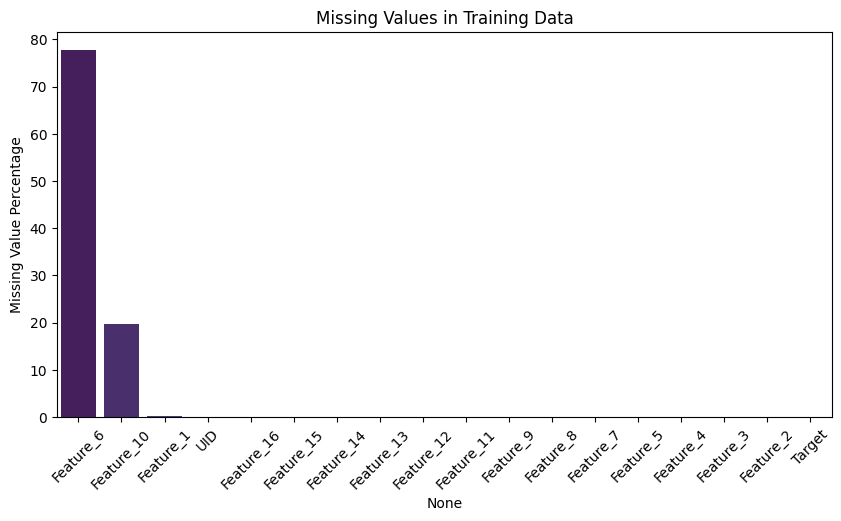

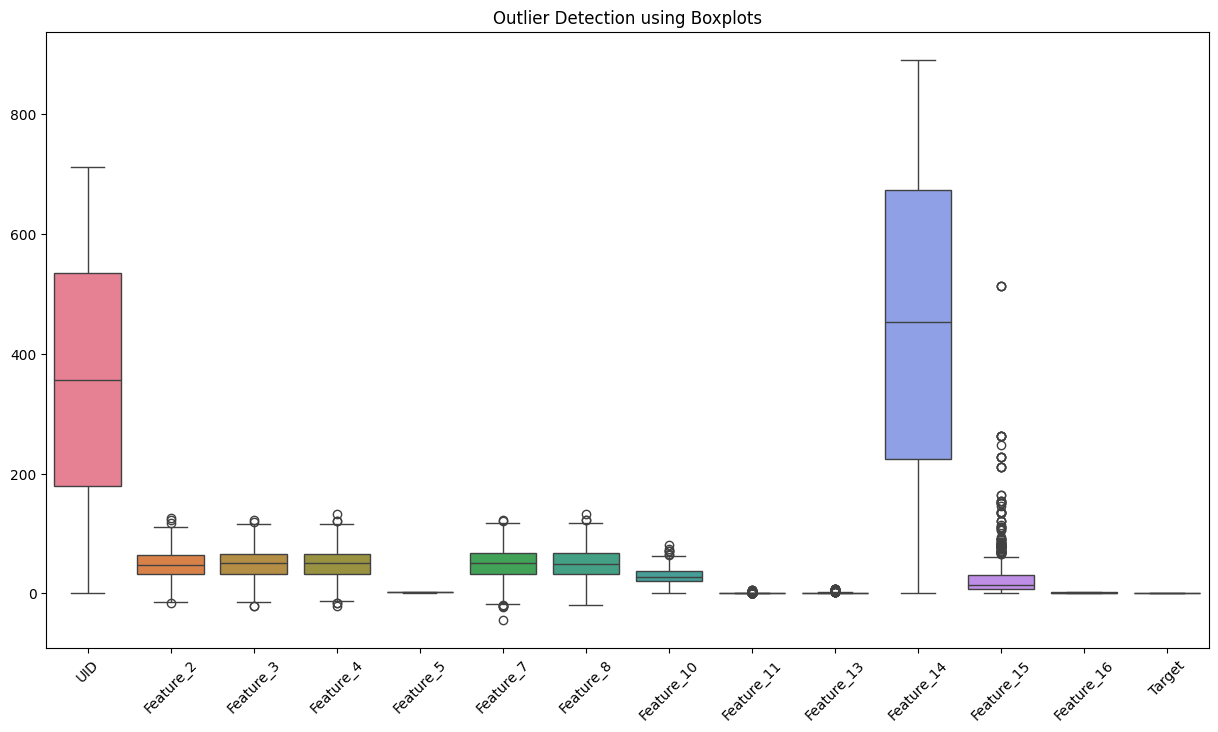

In [89]:
import seaborn as sns
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(train_df)) * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_percentage.index, y=missing_percentage, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Missing Value Percentage")
plt.title("Missing Values in Training Data")
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(data=train_df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=45)
plt.title("Outlier Detection using Boxplots")
plt.show()



In [90]:

train_df["Feature_1"].fillna(train_df["Feature_1"].mode()[0], inplace=True)  # Filling missing values with mode
train_df["Feature_10"].fillna(train_df["Feature_10"].median(), inplace=True)  # Filling missing values with median


# Fix negative values by replacing with NaN (for now) and imputing later
numeric_features = ["Feature_2", "Feature_3", "Feature_4", "Feature_8"]
for feature in numeric_features:
    train_df[feature] = train_df[feature].apply(lambda x: x if x >= 0 else None)
    test_df[feature] = test_df[feature].apply(lambda x: x if x >= 0 else None)

# Impute fixed negative values with median
for feature in numeric_features:
    train_df[feature].fillna(train_df[feature].median(), inplace=True)
    test_df[feature].fillna(test_df[feature].median(), inplace=True)

# Confirm missing values are handled
train_df.isnull().sum()

<ipython-input-90-39f994a84e63>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Feature_1"].fillna(train_df["Feature_1"].mode()[0], inplace=True)  # Filling missing values with mode
<ipython-input-90-39f994a84e63>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

,0
UID,0
Feature_1,0
Feature_2,0
Feature_3,0
Feature_4,0
Feature_5,0
Feature_6,553
Feature_7,0
Feature_8,0
Feature_9,0


In [91]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train_encoded = train_df.copy()
test_encoded = test_df.copy()

# Label Encoding for Feature_1 and Feature_12
label_encoders = {}
for col in ["Feature_1", "Feature_12"]:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train_encoded[col])

    label_encoders[col] = le  # Save the encoder for future use

# One-Hot Encoding for Feature_9 (High Cardinality)
train_encoded = pd.get_dummies(train_encoded, columns=["Feature_9"], drop_first=True)
test_encoded = pd.get_dummies(test_encoded, columns=["Feature_9"], drop_first=True)

# Ensure both train and test have the same columns after encoding
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Display encoded data
print(train_encoded.head())
print(test_encoded.head())


   UID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5 Feature_6  \
0    1          2       45.0       11.0       39.0          1      C124   
1    2          2       74.0       35.0       36.0          2       NaN   
2    3          2       62.0       38.0      100.0          3       NaN   
3    4          2       59.0       94.0       51.0          3       NaN   
4    5          2       26.0       72.0       33.0          3       NaN   

   Feature_7  Feature_8  Feature_10  ...  Feature_9_STON/O2. 3101283  \
0         45       30.0        45.5  ...                       False   
1         14       99.0        23.0  ...                       False   
2         65       47.0        32.0  ...                       False   
3         17       26.0        26.0  ...                       False   
4         45       17.0         6.0  ...                       False   

   Feature_9_STON/O2. 3101290  Feature_9_SW/PP 751  Feature_9_W./C. 14258  \
0                       False          

In [92]:
from sklearn.preprocessing import StandardScaler
#Applying to numerical features
numerical_features = ["Feature_2", "Feature_3", "Feature_4", "Feature_5", "Feature_7", "Feature_8",
                      "Feature_10", "Feature_11", "Feature_13", "Feature_14", "Feature_15", "Feature_16"]

scaler = StandardScaler()
train_encoded[numerical_features] = scaler.fit_transform(train_encoded[numerical_features])
test_encoded[numerical_features] = scaler.transform(test_encoded[numerical_features])

# Display scaled data
print(train_encoded.head())


   UID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5 Feature_6  \
0    1          2  -0.205781  -1.710407  -0.533697  -1.614136      C124   
1    2          2   1.005784  -0.685925  -0.664579  -0.400551       NaN   
2    3          2   0.504447  -0.557865   2.127560   0.813034       NaN   
3    4          2   0.379113   1.832592  -0.010172   0.813034       NaN   
4    5          2  -0.999565   0.893484  -0.795460   0.813034       NaN   

   Feature_7  Feature_8  Feature_10  ...  Feature_9_STON/O2. 3101283  \
0  -0.189341  -0.916656    1.253641  ...                       False   
1  -1.422491   2.028827   -0.477284  ...                       False   
2   0.606239  -0.190958    0.215086  ...                       False   
3  -1.303154  -1.087409   -0.246494  ...                       False   
4  -0.189341  -1.471602   -1.785093  ...                       False   

   Feature_9_STON/O2. 3101290  Feature_9_SW/PP 751  Feature_9_W./C. 14258  \
0                       False          

In [93]:
%pip install xgboost

In [94]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = train_encoded.drop(columns=["UID", "Target"])
y = train_encoded["Target"]

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train)
print(y_train)

     Feature_1  Feature_2  Feature_3  Feature_4  Feature_5 Feature_6  \
557          2  -0.372893   0.765424  -0.751833  -1.614136       E12   
369          1   0.003110  -1.368913  -0.708206   0.813034       NaN   
684          2  -0.289337  -0.387118  -1.144478  -0.400551       NaN   
342          2   0.838672   0.125122   0.731490   0.813034       NaN   
647          2  -0.247559   0.551990   2.171187  -0.400551       F33   
..         ...        ...        ...        ...        ...       ...   
71           2   1.924903  -1.326226   0.775117   0.813034       NaN   
106          2  -0.247559  -0.856672  -1.057223   0.813034       NaN   
270          2   0.462669   0.637363  -1.144478  -0.400551       NaN   
435          2   0.629781   0.637363  -0.228307   0.813034       NaN   
102          2  -1.500902  -0.045624  -0.271934   0.813034       NaN   

     Feature_7  Feature_8  Feature_10  Feature_11  ...  \
557   0.486902  -0.617839    1.445966   -0.479342  ...   
369   0.844913  -0.

In [95]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train_encoded = train_df.copy()
test_encoded = test_df.copy()

# Label Encoding for Feature_1 and Feature_12
label_encoders = {}
for col in ["Feature_1", "Feature_12"]:
    le = LabelEncoder()

    # Convert the column to string type before fitting LabelEncoder
    train_encoded[col] = le.fit_transform(train_encoded[col].astype(str))

    label_encoders[col] = le  # Save the encoder for future use

# One-Hot Encoding for Feature_9 (High Cardinality)
# Get a list of object (string) columns
object_cols = train_encoded.select_dtypes(include=['object']).columns.tolist()
# One-hot encode all object columns, excluding Feature_1 and Feature_12
for col in object_cols:
    if col not in ["Feature_1", "Feature_12", "UID", "Target"]: # Exclude already encoded and irrelevant columns
        train_encoded = pd.get_dummies(train_encoded, columns=[col], drop_first=True, prefix=[col])
        test_encoded = pd.get_dummies(test_encoded, columns=[col], drop_first=True, prefix=[col])


# Ensuring both train and test have the same columns after encoding
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Displaying encoded data
print(train_encoded.head())
print(test_encoded.head())

   UID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_7  \
0    1          2       45.0       11.0       39.0          1         45   
1    2          2       74.0       35.0       36.0          2         14   
2    3          2       62.0       38.0      100.0          3         65   
3    4          2       59.0       94.0       51.0          3         17   
4    5          2       26.0       72.0       33.0          3         45   

   Feature_8  Feature_10  Feature_11  ...  Feature_9_STON/O2. 3101283  \
0       30.0        45.5           0  ...                       False   
1       99.0        23.0           0  ...                       False   
2       47.0        32.0           0  ...                       False   
3       26.0        26.0           0  ...                       False   
4       17.0         6.0           2  ...                       False   

   Feature_9_STON/O2. 3101290  Feature_9_SW/PP 751  Feature_9_W./C. 14258  \
0                       Fal

In [96]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Split data into features (X) and target (y)
X = train_encoded.drop(columns=["UID", "Target"])
y = train_encoded["Target"]

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "bagging_clf": BaggingClassifier(estimator=LogisticRegression(), n_estimators=4),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "knn": KNeighborsClassifier(n_neighbors=2),
    "SVM": SVC(kernel='poly', C=5.0, gamma='scale')  # Support Vector Machine
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print(f"\n🔹 Model: {name}")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))



🔹 Model: Logistic Regression
Accuracy: 0.7062937062937062
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78        87
           1       0.68      0.46      0.55        56

    accuracy                           0.71       143
   macro avg       0.70      0.66      0.67       143
weighted avg       0.70      0.71      0.69       143

Confusion Matrix:
 [[75 12]
 [30 26]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


🔹 Model: bagging_clf
Accuracy: 0.6923076923076923
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.91      0.78        87
           1       0.71      0.36      0.48        56

    accuracy                           0.69       143
   macro avg       0.70      0.63      0.63       143
weighted avg       0.70      0.69      0.66       143

Confusion Matrix:
 [[79  8]
 [36 20]]

🔹 Model: Random Forest
Accuracy: 0.6643356643356644
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        87
           1       0.64      0.32      0.43        56

    accuracy                           0.66       143
   macro avg       0.66      0.60      0.60       143
weighted avg       0.66      0.66      0.63       143

Confusion Matrix:
 [[77 10]
 [38 18]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 Model: XGBoost
Accuracy: 0.6573426573426573
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        87
           1       0.59      0.43      0.49        56

    accuracy                           0.66       143
   macro avg       0.64      0.62      0.62       143
weighted avg       0.65      0.66      0.64       143

Confusion Matrix:
 [[70 17]
 [32 24]]

🔹 Model: knn
Accuracy: 0.6013986013986014
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.90      0.73        87
           1       0.47      0.14      0.22        56

    accuracy                           0.60       143
   macro avg       0.54      0.52      0.48       143
weighted avg       0.56      0.60      0.53       143

Confusion Matrix:
 [[78  9]
 [48  8]]

🔹 Model: SVM
Accuracy: 0.6293706293706294
Classification Report:
               precision    recall  f1-score   support

          

In [97]:
# Import necessary libraries
import pandas as pd

# Select the best model (Replace 'Logistic Regression' with the best-performing model)
best_model = models["bagging_clf"]  # Example: Change this based on performance

# Prepare test data (drop UID and Target, ensuring same columns as X_train)
X_test = test_encoded.drop(columns=["UID", "Target"])

# Ensure all columns are numeric
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric columns and handle them
if X_test.isnull().values.any():
    print("There are some non-numeric values in the test set that need to be handled.")
    # Fill or drop NaNs that resulted from non-numeric conversions
    X_test = X_test.fillna(0)  # Example: Filling NaNs with 0

# Predict Target values for test set
test_predictions = best_model.predict(X_test)

# Create submission dataframe
submission = pd.DataFrame({
    "UID": test_encoded["UID"],
    "Target": test_predictions
})

# Save submission file
submission.to_csv("Jayaditya_sahu_3_submission.csv", index=False)
print("✅ Submission file 'Jayaditya_sahu_3_submission.csv' is ready!")


There are some non-numeric values in the test set that need to be handled.
✅ Submission file 'Jayaditya_sahu_3_submission.csv' is ready!
